# Naive Bayes

## Introduction

We will start by working on the Iris dataset. Recall that Iris dataset contains iris species and sepal and petal measurements. We will quickly explore the dataset and jump into Naive Bayes.

In [50]:
from __future__ import print_function
import os
#Data Path has to be set as per the file location in your system
#data_path = ['..', 'data']
data_path = ['data']

## Question 1

* Load the Iris dataset.
* Take a quick look at the data types.
* Look at the skew values and decide if any transformations need to be applied. You can use skew value 0.75 as a threshold.
* Use `sns.pairplot` to plot the pairwise correlations and histograms. Use `hue="species"` as a keyword argument in order to see the distribution of species.

In [51]:
import pandas as pd
import numpy as np
#The filepath is dependent on the data_path set in the previous cell 
filepath = os.sep.join(data_path + ['Iris_Data.csv'])
data = pd.read_csv(filepath, sep=',', header=0)

In [52]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Notice that aside from the predictor variable, everything is float.

In [53]:
skew = pd.DataFrame(data.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

skew  too_skewed
sepal_length  0.314911       False
sepal_width   0.334053       False
petal_length -0.274464       False
petal_width  -0.104997       False

Fields are not too badly skewed.

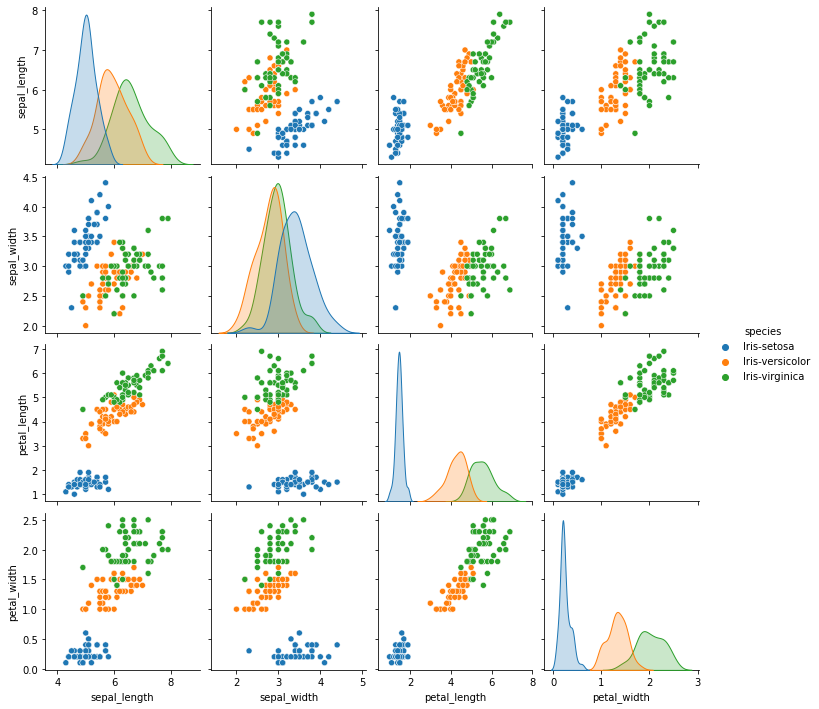

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.pairplot(data, hue='species')

## Question 2

Let's now fit a Naive Bayes classifier to this data in order to predict "species".

* Pick the appropriate type of Naive Bayes given the nature of your dataset (data types of columns). Recall, choices are
    * GaussianNB
    * MultinomialNB
    * BernoulliNB
* Use `cross_val_score` to see how well your choice works.

In [55]:
# Since the features are continuous, the right choice is GaussianNB

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
X = data[data.columns[:-1]]
y = data.species

GNB = GaussianNB()
cv_N = 4
scores = cross_val_score(GNB, X, y, n_jobs=cv_N, cv=cv_N)
print(scores)
np.mean(scores)

[0.94736842 0.94736842 0.91891892 1.        ]


0.9534139402560455

## Question 3:

Now let's try all types of Naive Bayes and observe what happens

* Compare the cross validation scores for Gaussian, Bernouilli and Multinomial Naive Bayes.
* Why is BernoulliNB performing like it does?

In [56]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
X = data[data.columns[:-1]]
y = data.species
nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB(),
      'multinomial': MultinomialNB()}
scores = {}
for key, model in nb.items():
    s = cross_val_score(model, X, y, cv=cv_N, n_jobs=cv_N, scoring='accuracy')
    scores[key] = np.mean(s)
scores

{'gaussian': 0.9534139402560455,
 'bernoulli': 0.3200568990042674,
 'multinomial': 0.966394025604552}

Looks like BernoulliNB results are very bad, but MultinomialNB is doing a very good job.

Why are the results of Bernoulli bad? Find out the reason.

## Question 4:

Let's see what happens when we take away the predictive features.

* Check the pairplot histograms (diagonal) you produced above and identify the two most predictive features visually.
* Remove the *petal_* features which are very predictive, and re-do the comparison above. That is, get the cross validation scores for all types of Naive Bayes.

In [57]:
X = data[['sepal_length', 'sepal_width']]
y = data.species

nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB(),
      'multinomial': MultinomialNB()}

# Try other variants on the lines shown in the previous cell for GaussianNB and compare the results on scoring = 'accuracy'. 
# Run the piece of code as shown in array in question 3


#Come up with your observations after taking away the very predictive features, which model works better

## Question 5

This question explores how Naive Bayes algorithms can be affected when we push the underlying (naive) assumption too much. Recall that the naive assumption is that the features in the training set are *independent* from each other.

* Create **0, 1, 3, 5, 10, 50, 100** copies of `sepal_length` and fit a `GaussianNB` for each one.
* Keep track of the save the average `cross_val_score`.
* Create a plot of the saved scores over the number of copies.

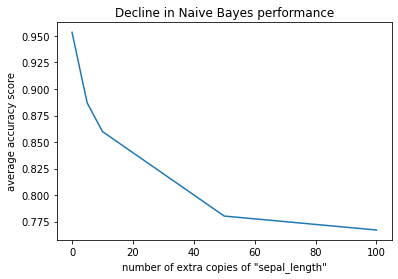

In [58]:
X = data[data.columns[:-1]]
y = data.species

n_copies = [0, 1, 3, 5, 10, 50, 100]


def create_copies_sepal_length(X, n):
    X_new = X.copy()
    for i in range(n):
        X_new['sepal_length_copy%s' % i] = X['sepal_length']
    return X_new


def get_cross_val_score(n):
    X_new = create_copies_sepal_length(X, n)
    scores = cross_val_score(GaussianNB(), X_new, y, cv=cv_N, n_jobs=cv_N)
    return np.mean(scores)


avg_scores = pd.Series(
    [get_cross_val_score(n) for n in n_copies],
    index=n_copies)

ax = avg_scores.plot()
ax.set(
    xlabel='number of extra copies of "sepal_length"',
    ylabel='average accuracy score',
    title='Decline in Naive Bayes performance');


## Question 6 - Naive Bayes on Human Activity Recongnition

In this question, we'll explore discretizing the dataset and then fitting MultinomialNB.  

* Load the Human Activity Recognition dataset. 
* Look at the data types. It's all continuous except for the target.
* Create `X` and `y` from `data`. `y` is the "Activity" column.
* Create training and test splits.
* Fit a GaussianNB to the training split.
* Get predictions on the test set.
* use `sns.heatmap` to plot the confusion matrix for predictions.

In [68]:
#Load the Human Activity Recognition dataset.
filepath = os.sep.join(data_path + ['Human_Activity_Recognition_Using_Smartphones_Data.csv'])
data = pd.read_csv(filepath, sep=',', header=0)

#Look at the data types. It's all continuous except for the target.
data.dtypes

tBodyAcc-mean()-X                       float64
tBodyAcc-mean()-Y                       float64
tBodyAcc-mean()-Z                       float64
tBodyAcc-std()-X                        float64
tBodyAcc-std()-Y                        float64
                                         ...   
angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
Length: 562, dtype: object

In [69]:
from sklearn.model_selection import train_test_split

#Create X and y from data. y is the "Activity" column.
X_data = data[data.columns[:-1]]
y_data = data.Activity

#Create training and test splits.
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size=0.3, random_state=42)

In [70]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
#Fit a GaussianNB to the training split.
print(X_train)
print(y_train)


GNB = GaussianNB()
GNB = GNB.fit(X_train, y_train)

#Get predictions on the test set.
y_pred = GNB.predict(X_test)

# use sns.heatmap to plot the confusion matrix for predictions.
print(accuracy_score(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred))

      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
5538           0.267568          -0.015712          -0.065980   
2755           0.277109          -0.013876          -0.112776   
5813           0.223730          -0.048263          -0.105781   
7506           0.285830          -0.004668          -0.152746   
1334           0.270514          -0.019739          -0.129706   
...                 ...                ...                ...   
5734           0.280806          -0.019976          -0.114793   
5191           0.278897          -0.030306          -0.096043   
5390           0.293946          -0.018341          -0.119916   
860            0.280475          -0.018976          -0.113756   
7270           0.263582           0.006928          -0.095320   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
5538         -0.995271         -0.977984         -0.963060         -0.996078   
2755         -0.997565         -0.987851         -0.992859 

<AxesSubplot:>

## Question 7

Now, let's discretize the dataset from Question 6. There are many ways to do this, but we'll use `pd.DataFrame.rank(pct=True)`.

a. Create `X_discrete` from `X` using .rank(pct=True)

b. Look at the values. They are still not discrete. Modify `X_discrete` so that it is indeed discrete. (Hint: try to get the first 2 digits using `.applymap`)

c. Split `X_discrete` and `y` into training and test datasets

d. Fit a MultinomialNB to the training split.

e. Get predictions on the test set.

f. Plot the confusion matrix for predictions.

In [72]:
#Create X_discrete from X using .rank(pct=True)
y_data = data.Activity
data = data.rank(pct=True)

X_discrete = data[data.columns[:-1]].rank(pct=True)
X_discrete = X_discrete.rank(pct=True)

#Modify X_discrete so that it is indeed discrete. 
func = lambda x: '%.2f' % x
X_discrete = X_discrete.applymap(func)
print(X_discrete)
#Split X_discrete and y into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_discrete, y_data, test_size=0.3, random_state=42)


      tBodyAcc-mean()-X tBodyAcc-mean()-Y tBodyAcc-mean()-Z tBodyAcc-std()-X  \
0                  0.75              0.34              0.16             0.15   
1                  0.57              0.56              0.23             0.02   
2                  0.62              0.37              0.36             0.15   
3                  0.60              0.23              0.23             0.11   
4                  0.47              0.55              0.32             0.02   
...                 ...               ...               ...              ...   
10294              0.84              0.05              0.73             0.72   
10295              0.94              0.11              0.60             0.70   
10296              0.93              0.97              0.32             0.68   
10297              0.15              0.95              0.76             0.68   
10298              0.03              0.41              0.14             0.68   

      tBodyAcc-std()-Y tBodyAcc-std()-Z

In [73]:
from sklearn.naive_bayes import MultinomialNB
print(y_train)
#Fit a MultinomialNB to the training split.
MNB = MultinomialNB()
MNB = MNB.fit(X_train, y_train)
y_pred = MNB.predict(X_test)


5538             SITTING
2755             SITTING
5813             WALKING
7506    WALKING_UPSTAIRS
1334            STANDING
              ...       
5734             SITTING
5191             WALKING
5390             WALKING
860             STANDING
7270             WALKING
Name: Activity, Length: 7209, dtype: object


In [78]:
import seaborn as sns

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()
# Preciision, recall, f-score from the multi-class support function
precision, recall, fscore, _ = score(y_test, y_pred, average='weighted')
    
# The usual way to calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# ROC-AUC scores can be calculated by binarizing the data
auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
          label_binarize(y_pred, classes=[0,1,2,3,4,5]), 
          average='weighted')

# Last, the confusion matrix
cm = confusion_matrix(y_test, y_pred)

metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                          'fscore':fscore, 'accuracy':accuracy,
                          'auc':auc}, 
                         name='GaussianNB'))

metrics = pd.concat(metrics, axis=1)

metrics

c:\users\t490\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


GaussianNB
precision    0.795097
recall       0.791909
fscore       0.789099
accuracy     0.791909
auc          0.000000

In [77]:
plot = sns.heatmap(cm, annot=True, fmt='d');
    
plt.tight_layout()